# Delay-and-Sum Beamformer - Linear Array of Infinite Length

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the masters course Selected Topics in Audio Signal Processing, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Beampattern

In this example the beampattern of a delay-and-sum (DSB) beamformer for a linear array of infinite length is computed and plotted for various steering angles. For numerical evaluation the array of infinite length is approximated by a long array of finite length. First, two functions are defined for computation and illustration of the beampattern, respectively.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

dx = 0.1  # spatial sampling interval (distance between microphones)
c = 343  # speed of sound

om = 2*np.pi * np.linspace(100, 8000, 1000)  # angular frequencies
theta_pw = np.linspace(0, np.pi, 181)  # angles of the incident plane waves


def compute_dsb_beampattern(theta, theta_pw, om, dx, nmic=5000):
    "Compute beampattern of a delay-and-sub beamformer for given steering angle"
    B = np.zeros(shape=(len(om), len(theta_pw)), dtype=complex)
    for n in range(len(om)):
        for mu in range(-nmic//2, nmic//2+1):
            B[n, :] += np.exp(-1j * om[n]/c * mu*dx * (np.cos(theta_pw) - np.cos(theta)))
            
    return B/nmic


def plot_dsb_beampattern(B, theta_pw, om):
    "Plot beampattern of a delay-and-sub beamformer"
    plt.figure(figsize=(10,10))
    plt.imshow(20*np.log10(np.abs(B)), aspect='auto', vmin=-50, vmax=0, origin='lower', \
               extent=[0, 180, om[0]/(2*np.pi), om[-1]/(2*np.pi)], cmap='viridis')
    plt.xlabel(r'$\theta_{pw}$ in deg')
    plt.ylabel('$f$ in Hz')
    plt.title('Beampattern')
    cb = plt.colorbar()
    cb.set_label(r'$|\bar{P}(\theta, \theta_{pw}, \omega)|$ in dB')

### Steering Angle $\theta = 90^\mathrm{o}$

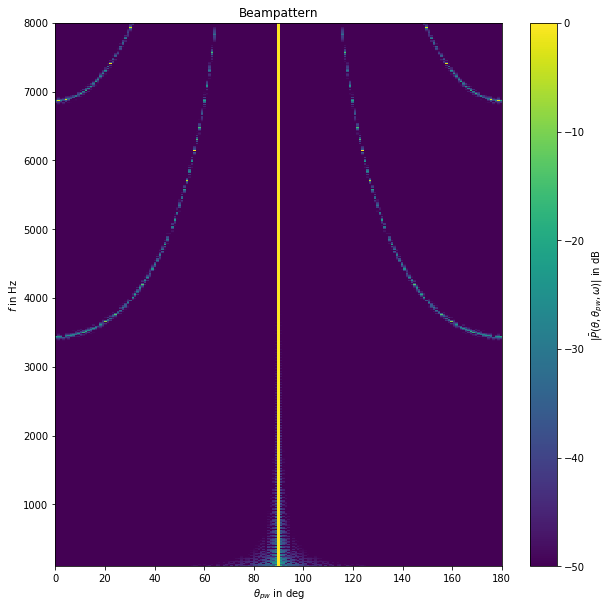

In [2]:
B = compute_dsb_beampattern(np.pi/2, theta_pw, om, dx)
plot_dsb_beampattern(B, theta_pw, om)

### Steering Angle $\theta = 45^\mathrm{o}$

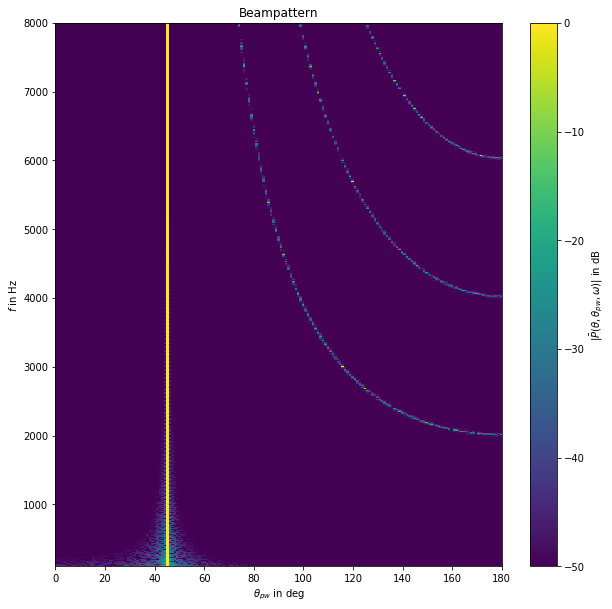

In [3]:
B = compute_dsb_beampattern(np.pi/4, theta_pw, om, dx)
plot_dsb_beampattern(B, theta_pw, om)

### Steering Angle $\theta = 0^\mathrm{o}$

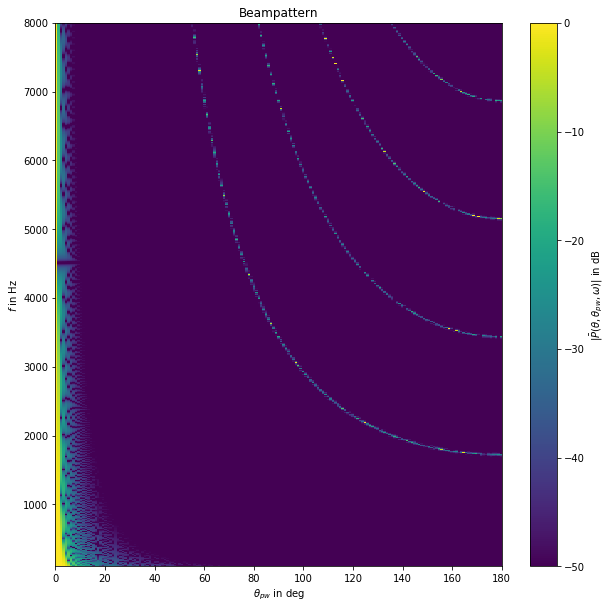

In [4]:
B = compute_dsb_beampattern(0, theta_pw, om, dx)
plot_dsb_beampattern(B, theta_pw, om)

**Copyright**

This notebook is provided as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text/images/data are licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Selected Topics in Audio Signal Processing - Supplementary Material, 2017*.